# Credit Card Users Churn Prediction

### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

## Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank

### Data Dictionary:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

### Importing Libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

# !pip3 install xgboost  
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


 
# !pip install --U scikit-learn

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix
)


#  To impute missing values
from sklearn.impute import KNNImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data

# !pip install -U imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
# !pip install nb_black
# %load_ext nb_black

### Loading Data

In [2]:
jmd = pd.read_csv("BankChurners.csv")

In [3]:
# Checking the number of rows and columns in the data
jmd.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns 

## Data Overview

In [4]:
# let's create a copy of the data
data = jmd.copy()

In [5]:
# let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [6]:
# let's view the last 5 rows of the data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [7]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are a total of 21 columns and 10127 observations in the dataset
- We can see that Education_Level and Marital_Status column have less than 10127 non-null values i.e. These columns have missing values. We'll explore this further.

In [8]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

In [9]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

- Education_Level column has 15% missing values
- Marital_Status column has 7.4% missing values

In [10]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


**Observations:**
- `Customer_Age` has a large range of values i.e. 26 to 73. 
- Columns - `Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Amt_Chng_Q4_Q1, Credit_Limit, Avg_Open_To_Buy` might have outliers on the right end as there is a large difference between 75th percentile and maximum values.
- Mean amount total spent per customer is 4404.086 and mean of the total trans is 64 so each transaction  less then 75 dollar, means costumers does not purchased big items with the bank credit card. we will look at it further.

## Data Preprocessing

- We can drop the column - `CLIENTNUM` as it is unique for each customer and will not add value to the model.

In [11]:
# Dropping column - CLIENTNUM
data.drop(columns=["CLIENTNUM"], inplace=True)

In [12]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


**Let's check the count of each unique category in each of the categorical variables.** 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [14]:
# Making a list of all categorical variables
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Dependent_count",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: 

- There are only 29 customers who is continueously active in the last one year.
- We have 8500 observations for the Existing costumer that 1 class but only 1627 observations for Attrited costumer that class 0.
- there is only 20 Platinum costumer in Card_Category column.
- we can combine Graduate, Post-Graduate, Doctorate in one which is Graduate in Education_Level column.
- There is a typo error 'abc' in Income_category column. we have to handle on Income_category column.

In [15]:
# change Attrition_Flag 0 and 1 category as costumer is existed or not
data.Attrition_Flag = data.Attrition_Flag.apply(lambda x: 1 if x == "Existing Customer" else 0)

In [16]:
# change Attrition_Flag datatype into int64 fron object
data["Attrition_Flag"]= data["Attrition_Flag"].astype("int64")

In [17]:
data.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
5,1,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311
6,1,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
7,1,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048
8,1,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
9,1,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [19]:
# Replacing ["Graduate","Post-Graduate","Doctorate"] with Graduate
data["Education_Level"] = data["Education_Level"].replace(["Graduate","Post-Graduate","Doctorate"], "Graduate")

In [20]:
# Replacing "abc" with np.nan values
data["Income_Category"] = data["Income_Category"].replace("abc", np.nan) 


In [21]:
# Making a column as categorical types
cat_col1 = [
    "Gender",
    "Dependent_count",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
]

# Printing number of count of each unique value in each column
for column in cat_col1:
    data[column]= data[column].astype("category")
    

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

#### Handle Missing Values

In [23]:
# find out median values for Education_level column to replace with missing values
categories = ["Graduate", "High School", "Uneducated", "College"]
data["Education_Level"] = pd.Categorical(data["Education_Level"], categories, ordered=True)

median_value = np.median(data["Education_Level"].cat.codes)
median_text = categories[int(median_value)]
print(median_text)


Graduate


In [24]:
# replacing missing values with median for Education_Level column
data["Education_Level"].fillna(value= "Graduate", inplace=True)

In [25]:
# find out median values for Marital_Status column to replace with missing values
categories = ["Married", "Single", "Divorced"]
data["Marital_Status"] = pd.Categorical(data["Marital_Status"], categories, ordered=True)

median_value = np.median(data["Marital_Status"].cat.codes)
median_text = categories[int(median_value)]
print(median_text)

Married


In [26]:
# replacing missing values with median for Marital_Status column
data["Marital_Status"].fillna(value= "Married", inplace=True)

In [27]:
# find out median values for Marital_Status column to replace with missing values
categories = ["Less than $40K", "$40K - $60K", "$80K - $120K", "$60K - $80K", "$120K +"]
data["Income_Category"] = pd.Categorical(data["Income_Category"], categories, ordered=True)

median_value = np.median(data["Income_Category"].cat.codes)
median_text = categories[int(median_value)]
print(median_text)

$40K - $60K


In [28]:
# replacing missing values with median for Marital_Status column
data["Income_Category"].fillna(value= "$40K - $60K", inplace=True)

In [29]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## EDA

### Univariate

In [30]:
# !pip install -U seaborn

In [31]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

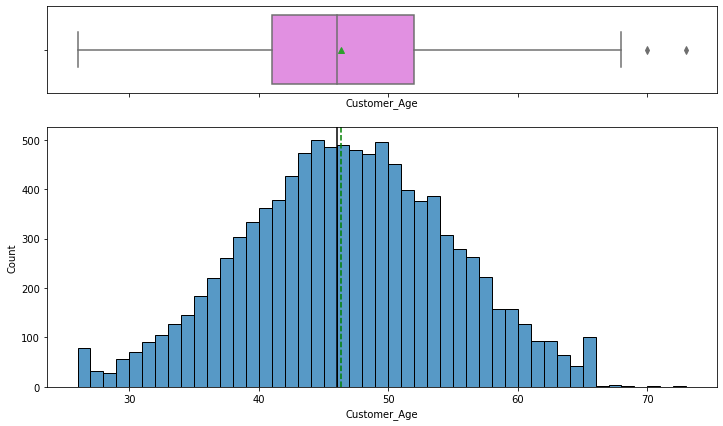

In [32]:
# Observations on Customer_age
histogram_boxplot(data, "Customer_Age")

- As per the boxplot, there are some outliers in the 'Customer_Age' variable
- Age has a fairly normal distribution with approx equal mean and median

In [33]:
data["Customer_Age"].nlargest(10)

251    73
254    70
151    68
198    68
177    67
320    67
410    67
432    67
39     66
52     66
Name: Customer_Age, dtype: int64

In [34]:
data[data["Customer_Age"] > 68]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
251,1,73,M,0,High School,Married,$40K - $60K,Blue,36,5,3,2,4469.000,1125,3344.000,1.363,1765,34,1.615,0.252
254,1,70,M,0,High School,Married,Less than $40K,Blue,56,3,2,3,3252.000,1495,1757.000,0.581,1227,15,0.875,0.460


- The values for Customer_Age for these 2 observations need not be incorrect
- So, dropping them will lead us to loss of information
- Let's cap them with next highest value

In [35]:
# Capping values for Total_Trans_Ct at 132
data["Customer_Age"].clip(upper=68, inplace=True)

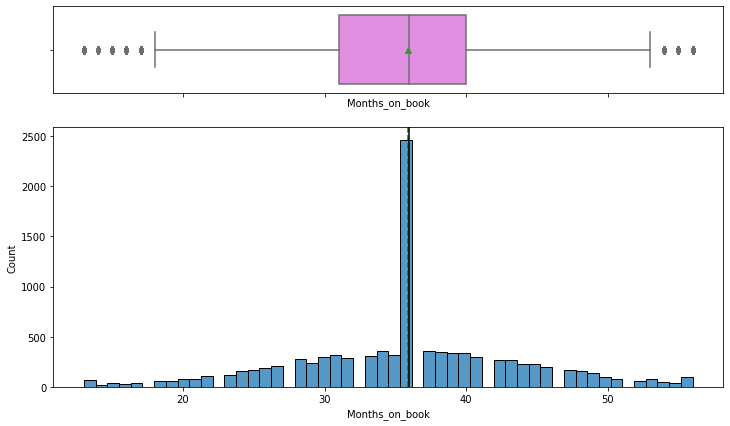

In [36]:
# observations on Months_on_book
histogram_boxplot(data, "Months_on_book")

- We can see there are some both side lower and upper percentage outliers in the 'Months_on_book' variable.
- Months_on_book has a fairly normal distribution
- costumer usually stay approx 36 months with using the bank credit card

In [37]:
# data[data["Income"] > 200000]


In [38]:
# Dropping observaion with income greater than 20000. Since there is just 1 such observation
# data.drop(index=data[data.Income > 200000].index, inplace=True)

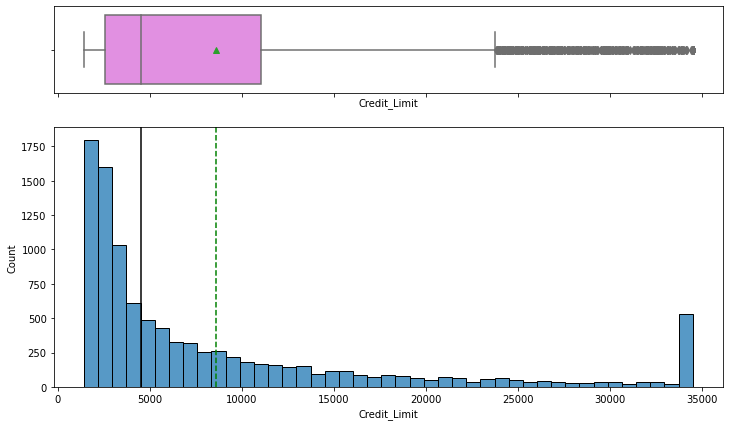

In [39]:
# observations on Credit_Limit
histogram_boxplot(data, "Credit_Limit")

- There are a lot of upper side outliers in the 'Credit_Limit' variable
- The distribution is highly skewed to right.
- As the median of the distribution is less than 5000, more than 50% of customers have Credit Limit which is less than 5000 per month.


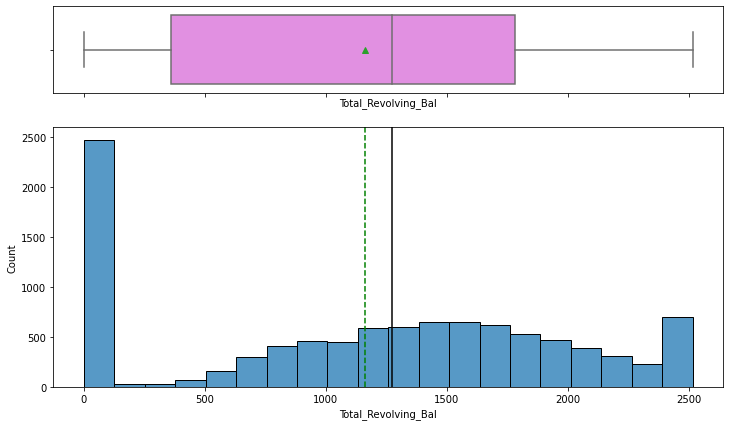

In [40]:
# observations on MntWines
histogram_boxplot(data, "Total_Revolving_Bal")

- The distribution for Total_Revolving_Bal is looks normal but 0-50 balance is a biggest stake on the distribution.
- As the median of the distribution is 1276 and close to mean value of the distribution.
- There are no outliers.

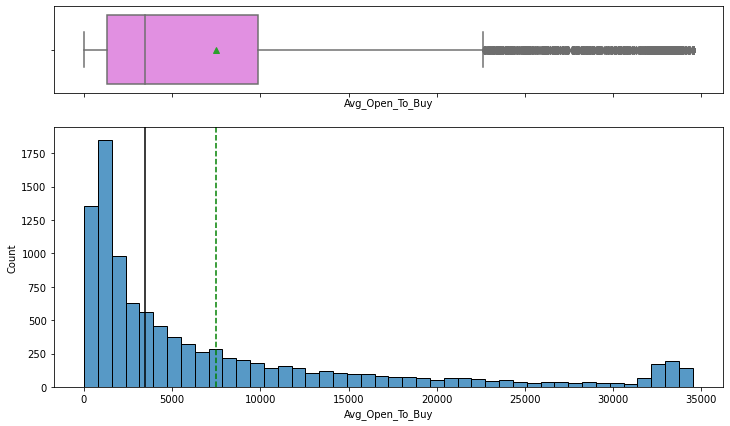

In [41]:
# observations on Avg_Open_To_Buy
histogram_boxplot(data, "Avg_Open_To_Buy")

- The distribution for Avg_Open_To_Buy is highly skewed to the right.
- As the median of the distribution is less than 4000, more than 50% of customers have willing to spend less than 4000 per month.
- There are so many outliers on the right end of the boxplot but we will treat them as expected way.

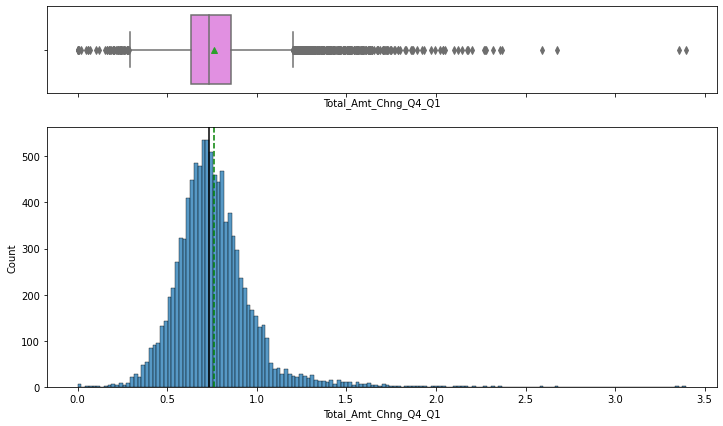

In [42]:
# observations on Total_Amt_Chng_Q4_Q1
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

- The distribution for Total_Amt_Chng_Q4_Q1 is normal but little bit close to left side.
- We can see that there are so many outliers in both side lower and upper percentile and some extreme observations in the variable that can be considered as outliers as they very far from the rest of the values. 

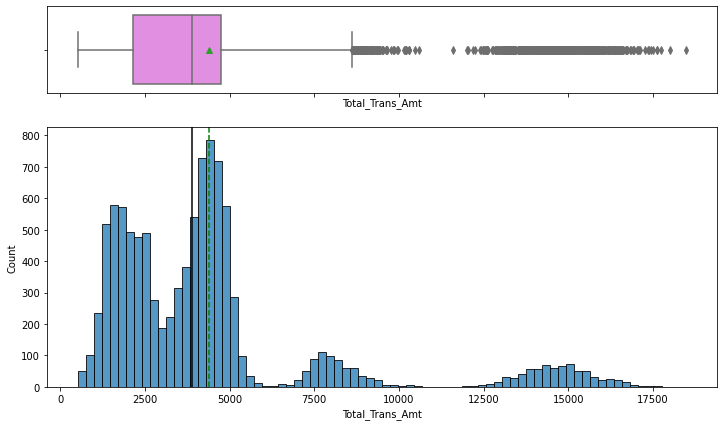

In [43]:
# observations on Total_Trans_Amt
histogram_boxplot(data, "Total_Trans_Amt")

- The distribution for Total_Trans_Amt is right-skewed
- There are lots of outliers on the right end in the boxplot but we will treat them as this represents a real market

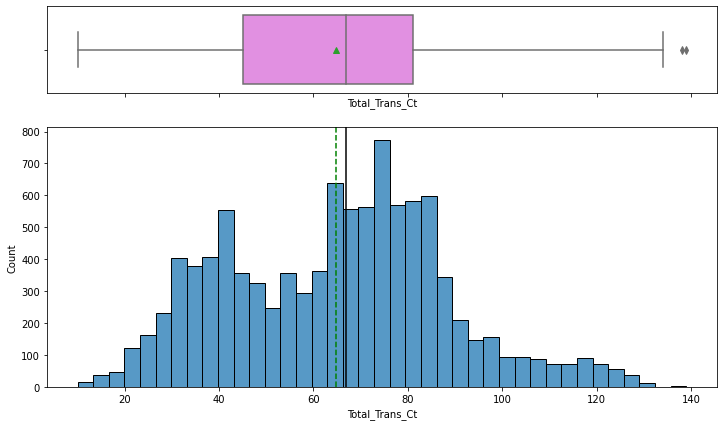

In [44]:
# observations on Total_Trans_Ct
histogram_boxplot(data, "Total_Trans_Ct")

- The distribution for Total_Trans_Ct looks normal.  
- There is couple observation to the right extreme which can be considered as an outlier. 
- We will not remove all such data points as they represent real market trends but we can cap some of the extreme values.

In [45]:
data["Total_Trans_Ct"].nlargest(10)

9324     139
9586     138
9213     134
9629     132
9261     131
9269     131
9339     131
9728     131
9841     131
10085    131
Name: Total_Trans_Ct, dtype: int64

In [46]:
data[data["Total_Trans_Ct"] > 132]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9213,1,32,M,1,Uneducated,Single,$60K - $80K,Silver,36,2,3,1,33711.000,1437,32274.000,0.942,14880,134,0.654,0.043
9324,1,41,M,3,Graduate,Married,$120K +,Blue,33,2,4,3,34516.000,638,33878.000,0.724,13085,139,0.675,0.018
9586,1,56,F,1,High School,Married,$40K - $60K,Blue,49,1,2,1,17542.000,2517,15025.000,0.800,13939,138,0.792,0.143


- The values for Total_Trans_Ct for these 3 observations need not be incorrect
- So, dropping them will lead us to loss of information
- Let's cap them with next highest value

In [47]:
# Capping values for Total_Trans_Ct at 132
data["Total_Trans_Ct"].clip(upper=132, inplace=True)

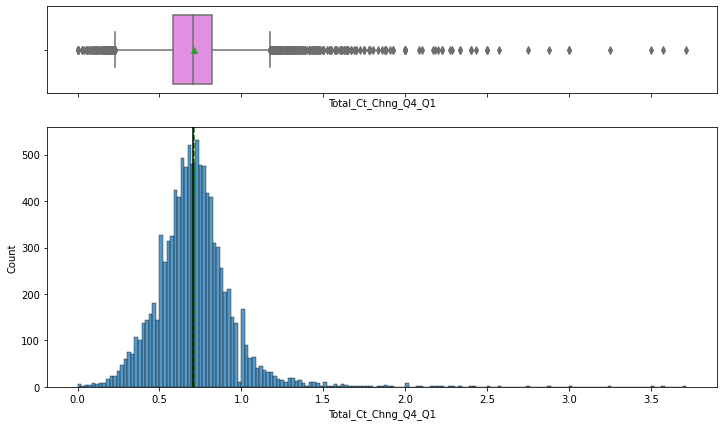

In [48]:
# observations on Total_Ct_Chng_Q4_Q1
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

- The distribution for Total_Ct_Chng_Q4_Q1 looks normal distribution. 
- There are so many outliers in Total_Ct_Chng_Q4_Q1. We will not remove all such data points as they represent real market trends but we can handle outliers and cap some of the extreme values.

In [49]:
data["Total_Ct_Chng_Q4_Q1"].nlargest(10)

1     3.714
773   3.571
269   3.500
12    3.250
113   3.000
190   3.000
146   2.875
366   2.750
30    2.571
4     2.500
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

In [50]:
data[data["Total_Ct_Chng_Q4_Q1"] > 2.875]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
12,1,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.000,0,11751.000,3.397,1539,17,3.250,0.000
113,1,54,F,0,Uneducated,Married,Less than $40K,Blue,36,2,2,2,1494.000,706,788.000,1.674,1305,24,3.000,0.473
190,1,57,M,1,Graduate,Married,$80K - $120K,Blue,47,5,3,1,14612.000,1976,12636.000,1.768,1827,24,3.000,0.135
269,1,54,M,5,Graduate,Married,$60K - $80K,Blue,38,3,3,3,2290.000,1434,856.000,0.923,1119,18,3.500,0.626
773,1,61,M,0,Graduate,Married,$40K - $60K,Blue,53,6,2,3,14434.000,1927,12507.000,2.675,1731,32,3.571,0.134


- The values for Total_Ct_Chng_Q4_Q1 for these 6 observations need not be incorrect
- So, dropping them will lead us to loss of information
- Let's cap them with next highest value

In [51]:
# Capping values for amount spent on gold products at 250
data["Total_Ct_Chng_Q4_Q1"].clip(upper=2.875, inplace=True)

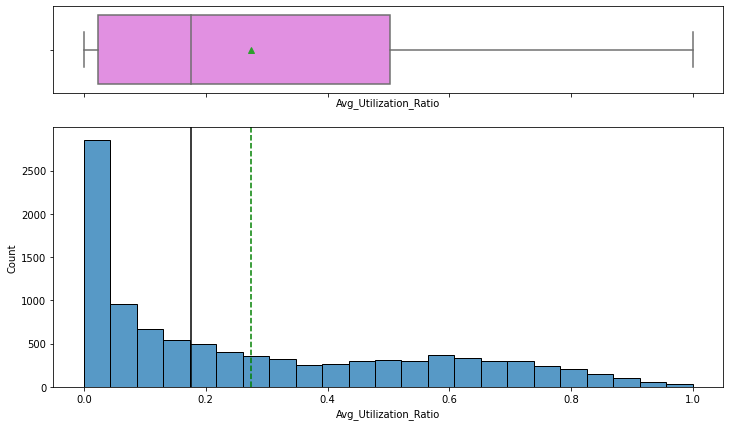

In [52]:
# observations on Avg_Utilization_Ratio
histogram_boxplot(data, "Avg_Utilization_Ratio")

- The distribution is left - skewed as we seen. 
- Avg_Utilization_Ratio of the customers is approx 0.27 or 27% of costumer credit line used for purchasing by costumers so credit card usage is very low among bank costumers.  
- We can see that there are no outliers or extreme observations in the variable.

In [53]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

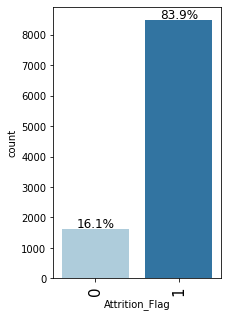

In [54]:
# observations on Attrition_Flag
labeled_barplot(data, "Attrition_Flag", perc=True)

- 83% of the costumers are still continue to theri account open.

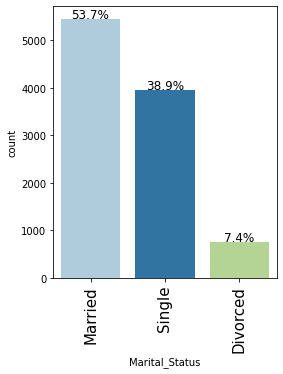

In [55]:
# observations on Marital_Status
labeled_barplot(data, "Marital_Status", perc=True)

- Majority of the customers are married comprising approx 53.7% of total customers.

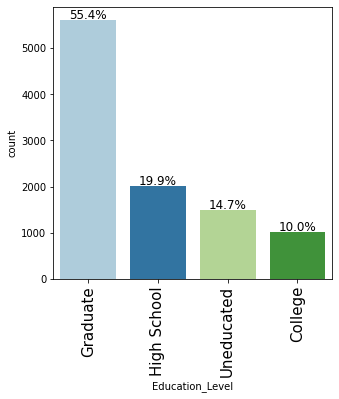

In [56]:
# observations on Education
labeled_barplot(data, "Education_Level", perc=True)

- Education of approx 55% of customers is at graduation level.
- respectively lower observations i.e. ~14% for customers with no education history.
- lowest observations, ~10% for costumer with college degree.

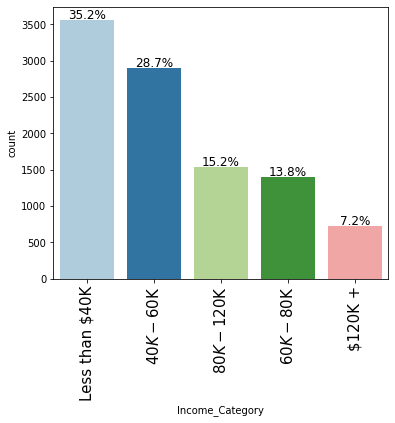

In [57]:
# observations on Income_Category
labeled_barplot(data, "Income_Category",perc=True)

- ~35% of customers have less than 40K income annually and very low percent ~7% of the costumers have 120K+ income annualy

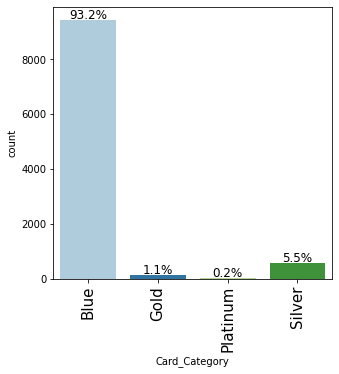

In [58]:
# observations on Card_Category
labeled_barplot(data, "Card_Category", perc=True)

- Majority of the customers i.e. ~93% of the customers have Blue card
- There are very few customers, only ~5% slightly better than others, with silver card.

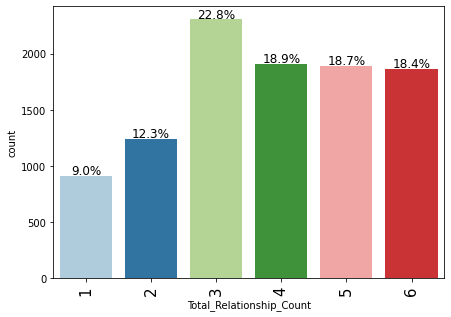

In [59]:
# observations on Total_Relationship_Count
labeled_barplot(data, "Total_Relationship_Count",perc=True)

- Approx 22% of customers have 3 account in the bank system which is the highest score and 18% of the costumers have 4 or more account with the bank.
- This might be shown as because the company provides other good financial services and might be customers have only one 'Blue card' but more than 3 account. 

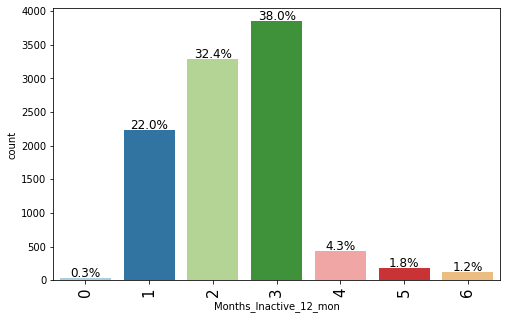

In [60]:
# observations on Months_Inactive_12_mon
labeled_barplot(data, "Months_Inactive_12_mon",perc=True)

- The number of customers activity is highest in 3 month activity term and it's approx 38% of the costumer.
- First 3 moths inactivity is very high i.e ~82%. so people open account but not follow that account.

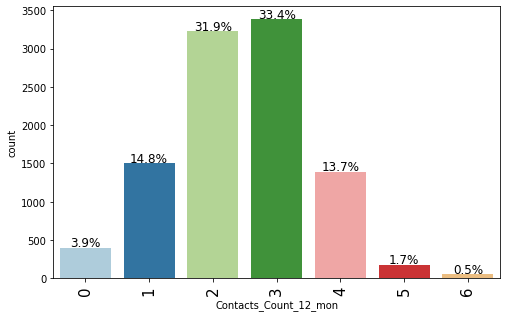

In [61]:
# observations on Contacts_Count_12_mon quarter
labeled_barplot(data, "Contacts_Count_12_mon", perc=True)

- There is no significant difference in 2 or 3 number of contact between bank and costumer for each year and ~65% of total contact and 2 or 3 time contact is very very low for a year to keep costumer use for the banck service, there is alot of opportunity outside. 
- bank should increase number of contact ratio for each costumer.


### Bivariate Analysis

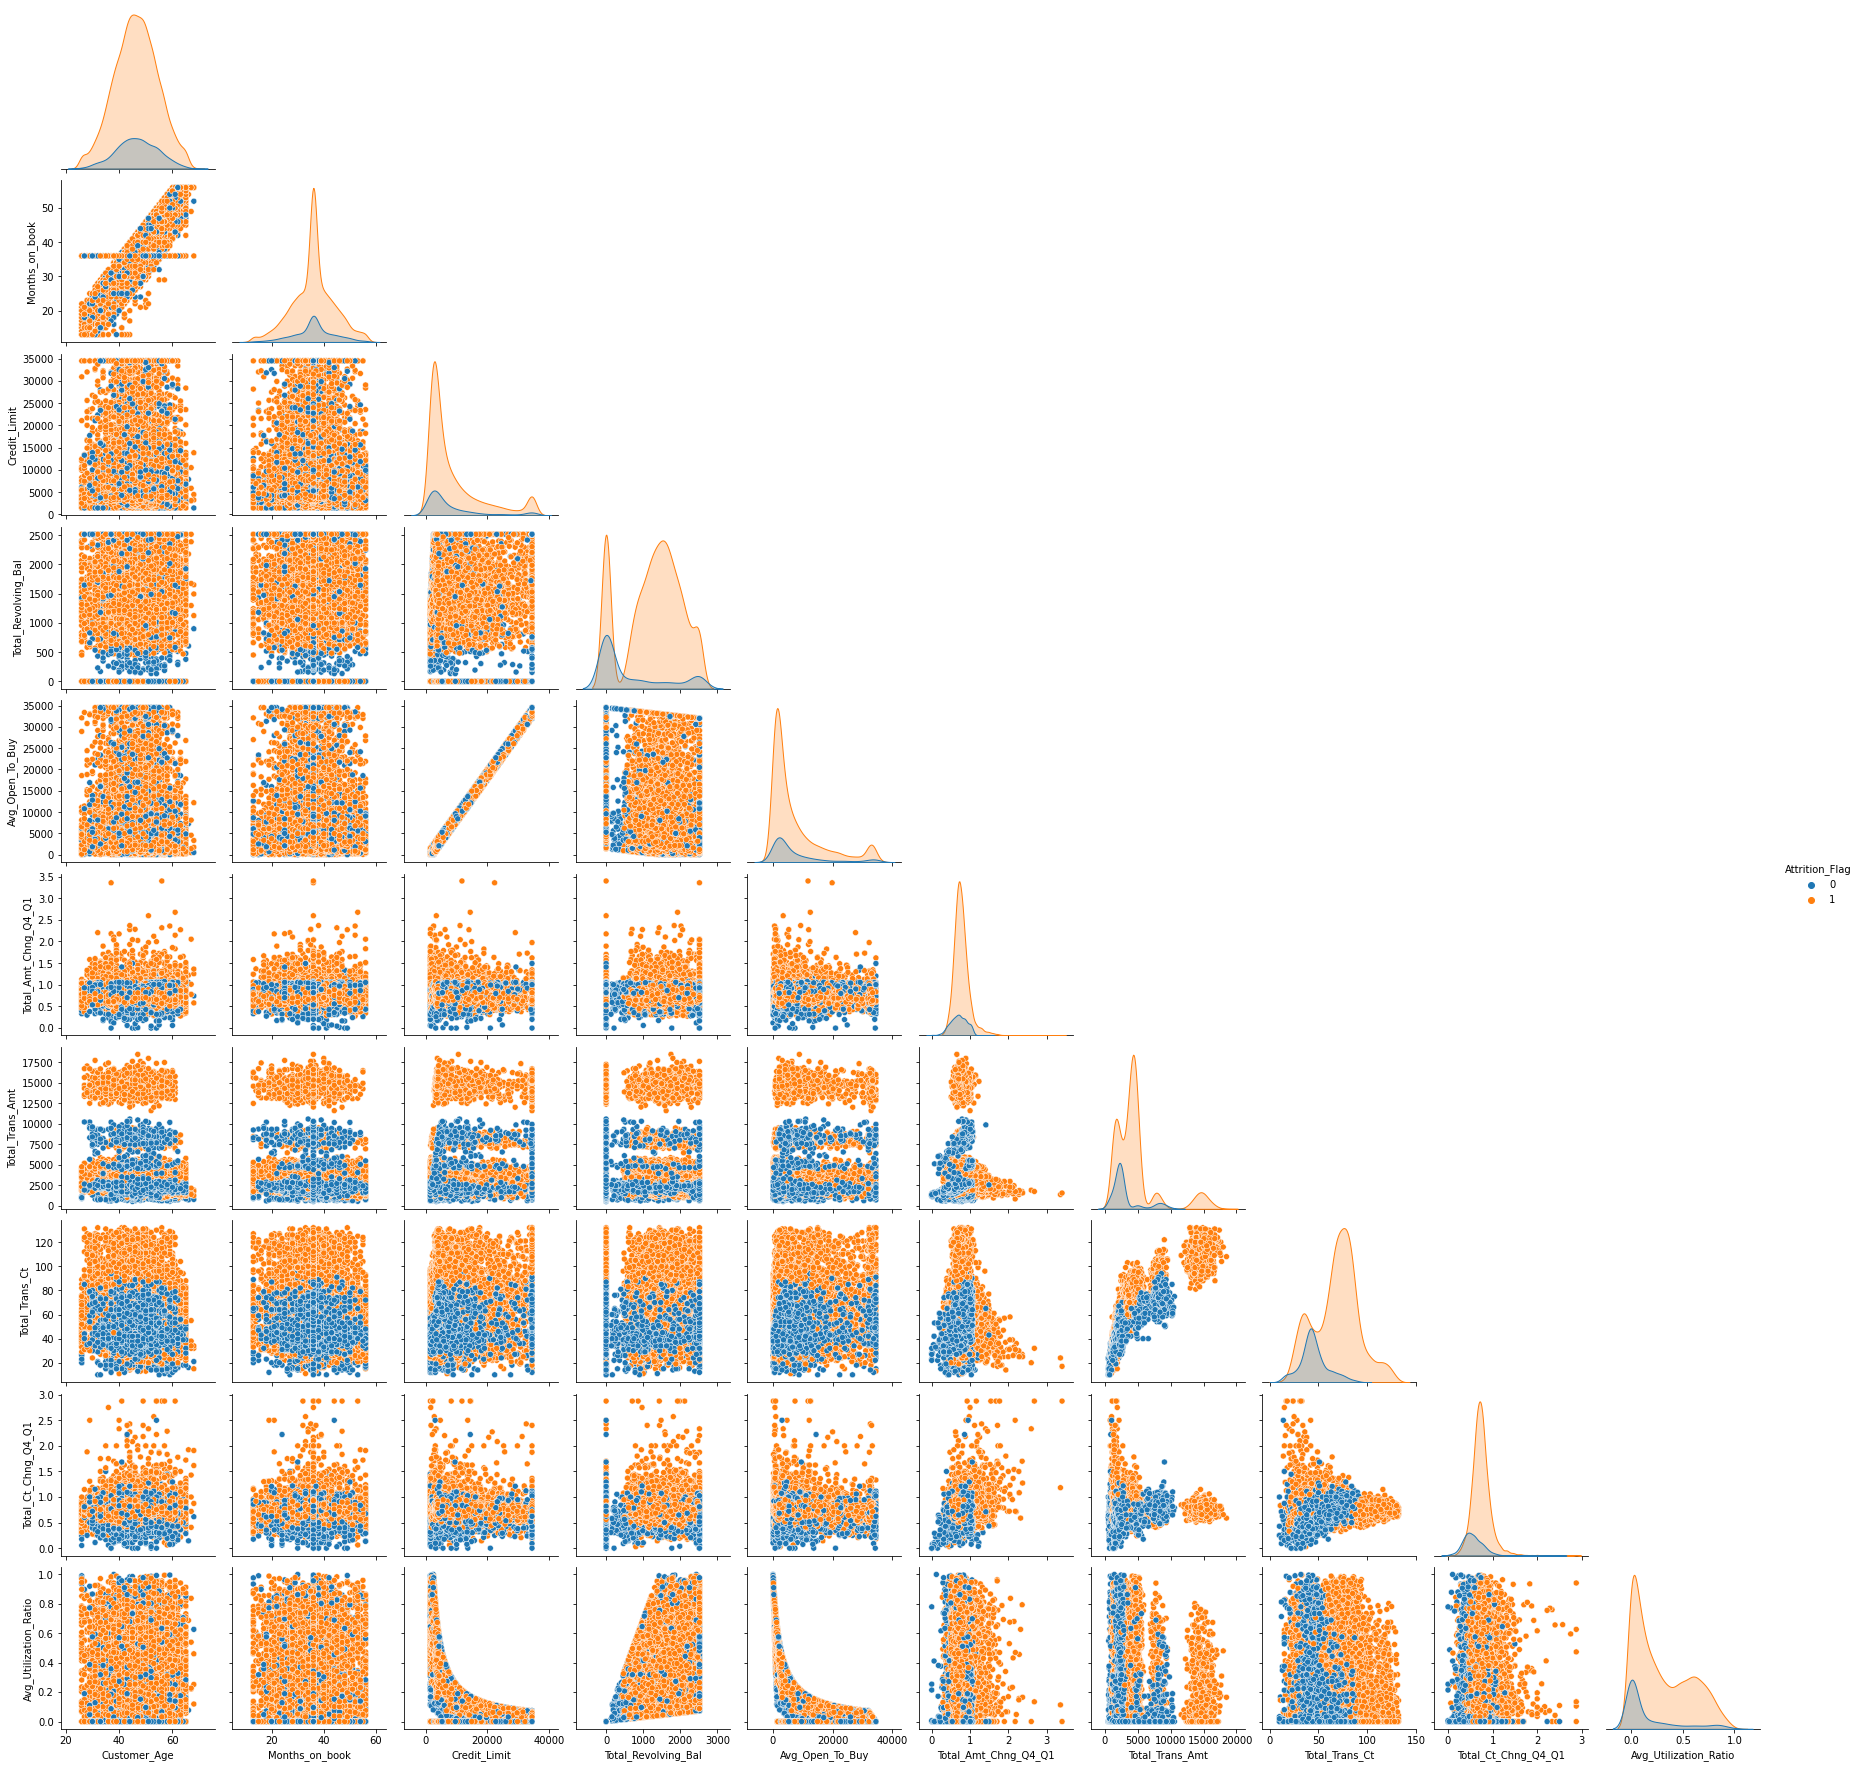

In [62]:
sns.pairplot(data, hue="Attrition_Flag", corner=True)

- There are overlaps i.e. no clear distinction in the distribution of variables for people who have keep open the credit card product or not.
- Let's explore this further with the help of other plots.

In [63]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [64]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [65]:
# contingency tables catg vs catg
def get_ct(df, var):
    ct_res = pd.crosstab(df[var], df["Attrition_Flag"], margins=True)
    ct_res["Closed Account %"] = round((ct_res[0] / ct_res["All"]) * 100, 2)
    return ct_res.drop("All", axis=1)


def get_strat_ct(df, strat_var, var):
    ct_res = pd.crosstab(
        index=[df[strat_var], df[var]], columns=df["Attrition_Flag"], margins=True
    )
    ct_res["Accepted %"] = round(ct_res[1] / ct_res["All"] * 100, 2)
    return ct_res.drop(columns="All").drop("All", level=0)

**'Customer_Age' vs 'Attrition_Flag'**

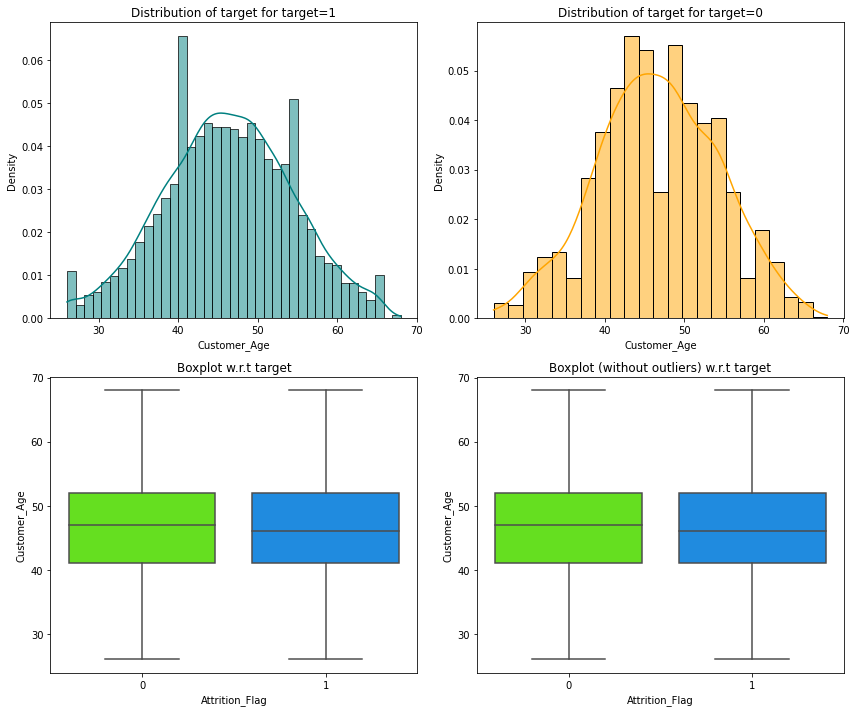

In [66]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

- No significant difference in closing account by Customer_Age

**'Months_on_book' vs 'Attrition_Flag'**

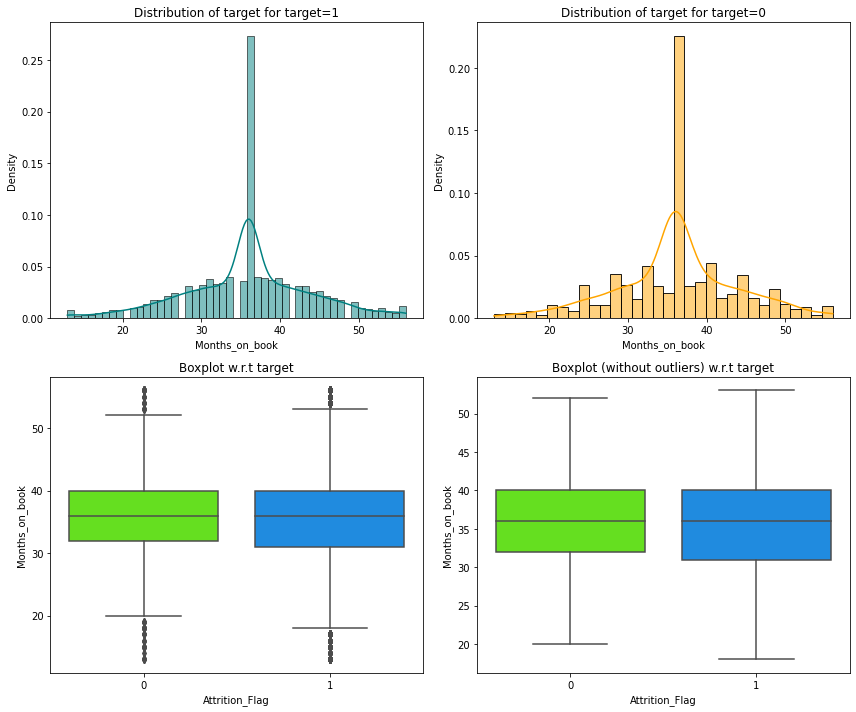

In [67]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

- No significant difference in closing account by Months_on_book

**'Credit_Limit' vs 'Attrition_Flag'**

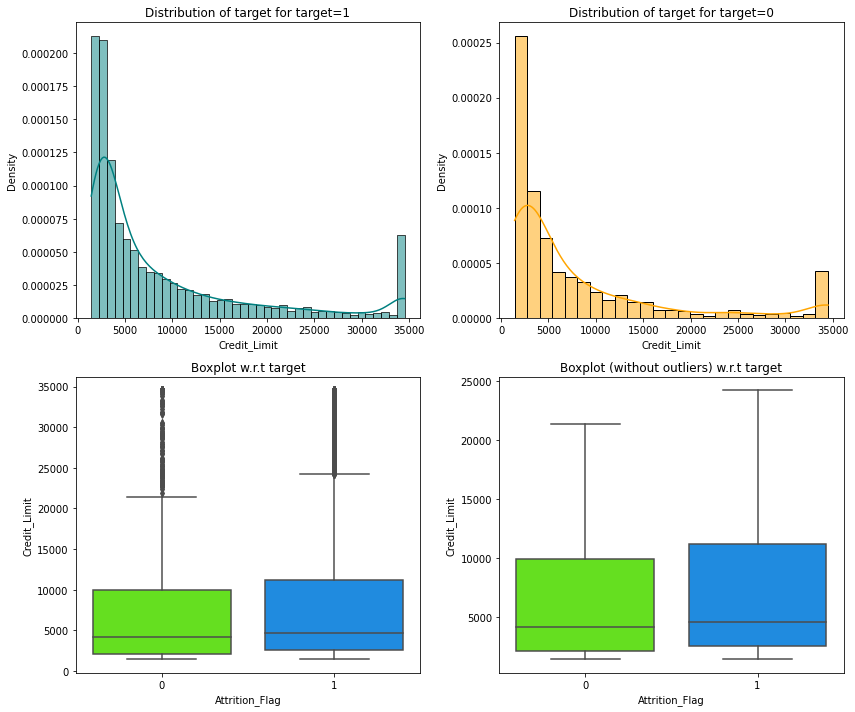

In [68]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

- No significant difference in closing account by Credit_Limit

**'Total_Revolving_Bal' vs 'Attrition_Flag'**

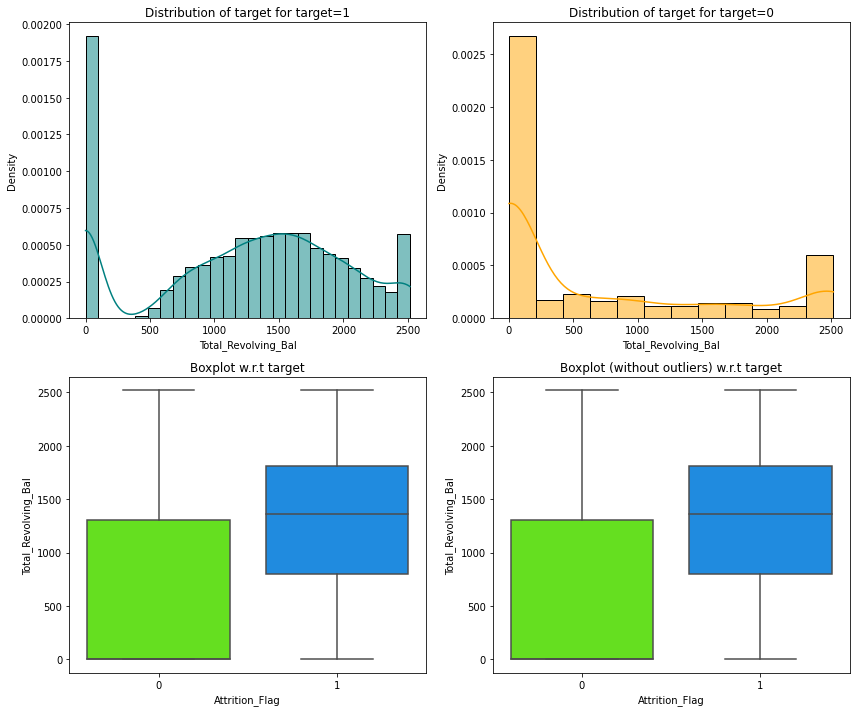

In [69]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

- There is significant difference in closing account by Total_Revolving_Bal. if there is low balance costumer likely to intend to close account. 

**'Avg_Open_To_Buy' vs 'Attrition_Flag'**

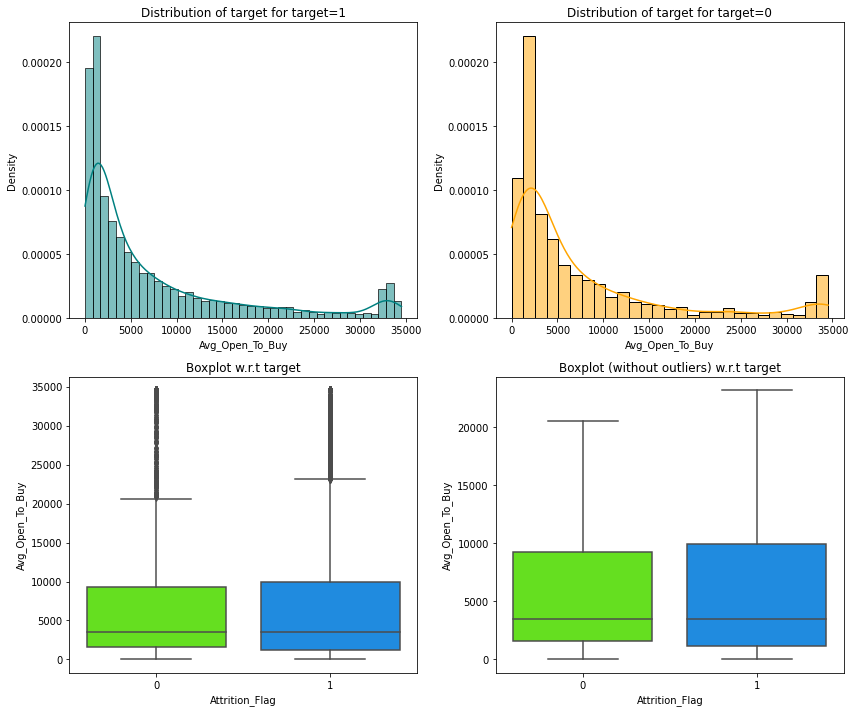

In [70]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

- No significant difference in closing account by Avg_Open_To_Buy

**'Total_Amt_Chng_Q4_Q1' vs 'Attrition_Flag'**

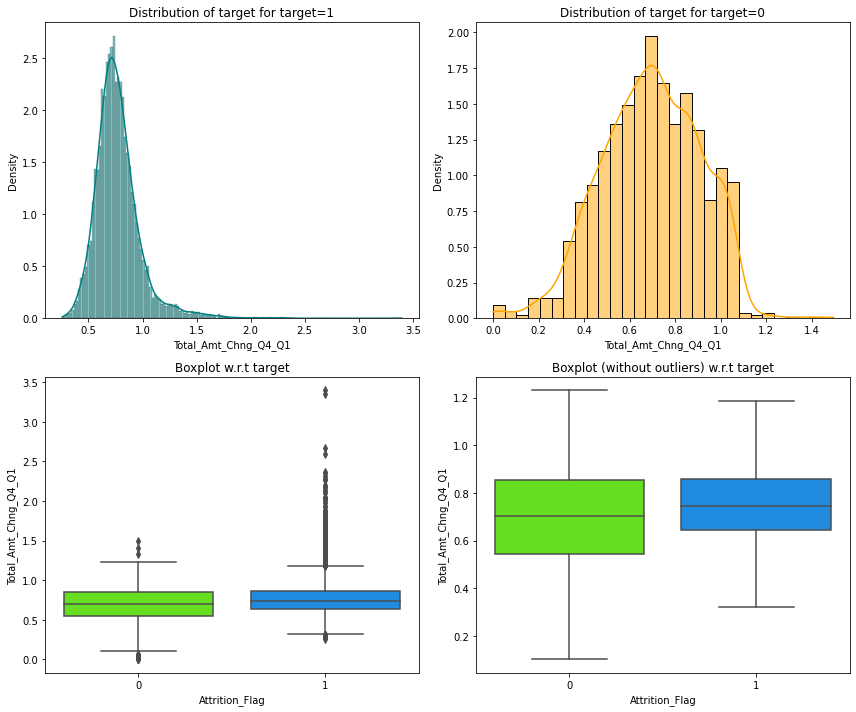

In [71]:
distribution_plot_wrt_target(data, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

- No significant difference in closing account by Total_Amt_Chng_Q4_Q1

**'Total_Trans_Amt' vs 'Attrition_Flag'**

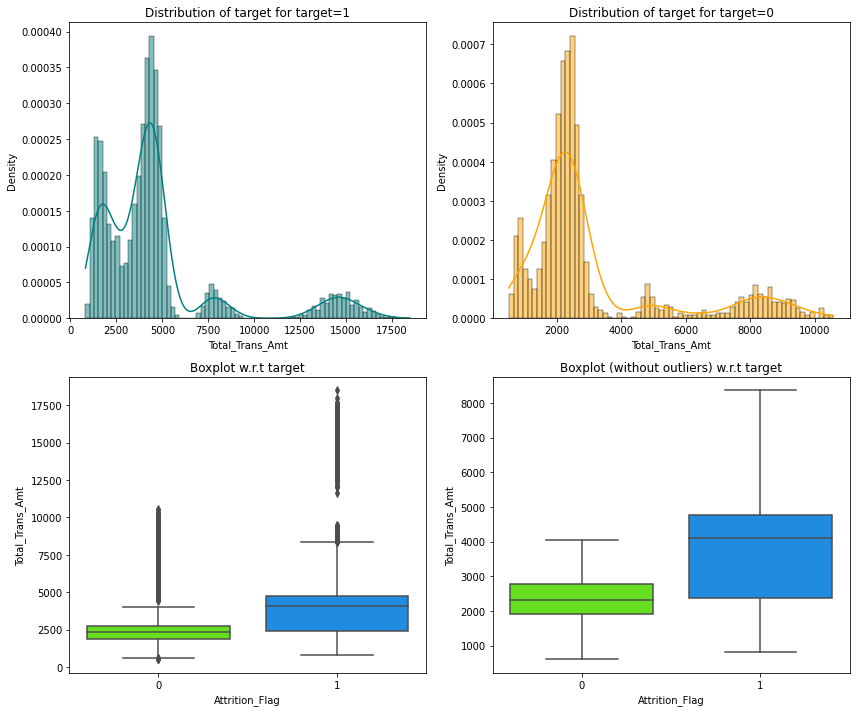

In [72]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

- There is significant difference in closing account by Total_Trans_Amt. if there is lower amount,  costumer likely to intend to close account. 

**'Total_Trans_Ct' vs 'Attrition_Flag'**

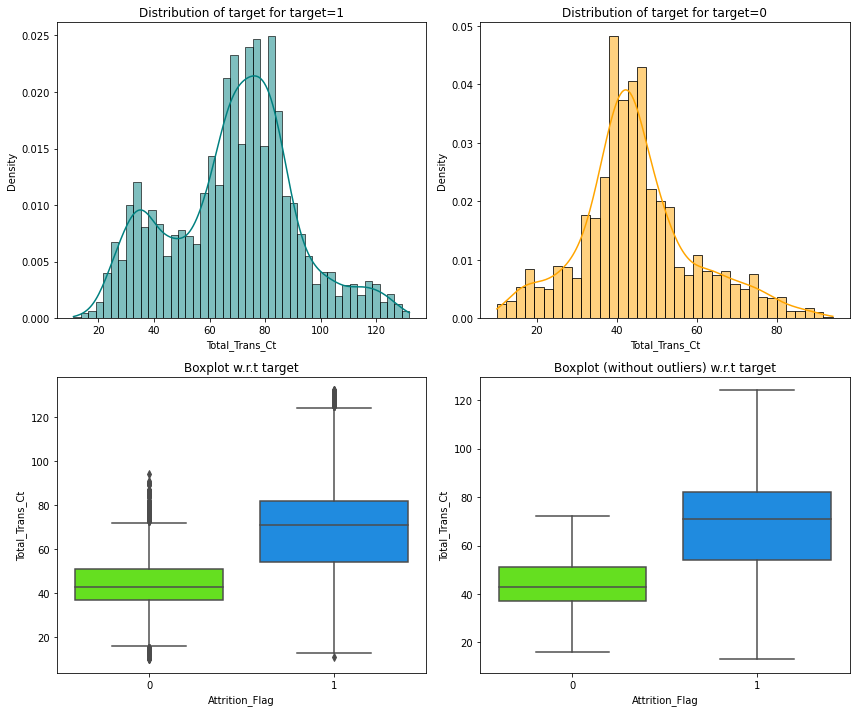

In [73]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

- There is significant difference in closing account by Total_Trans_Ct. if there is lower number of transaction, costumer likely to intend to close account. 

**'Total_Ct_Chng_Q4_Q1' vs 'Attrition_Flag'**

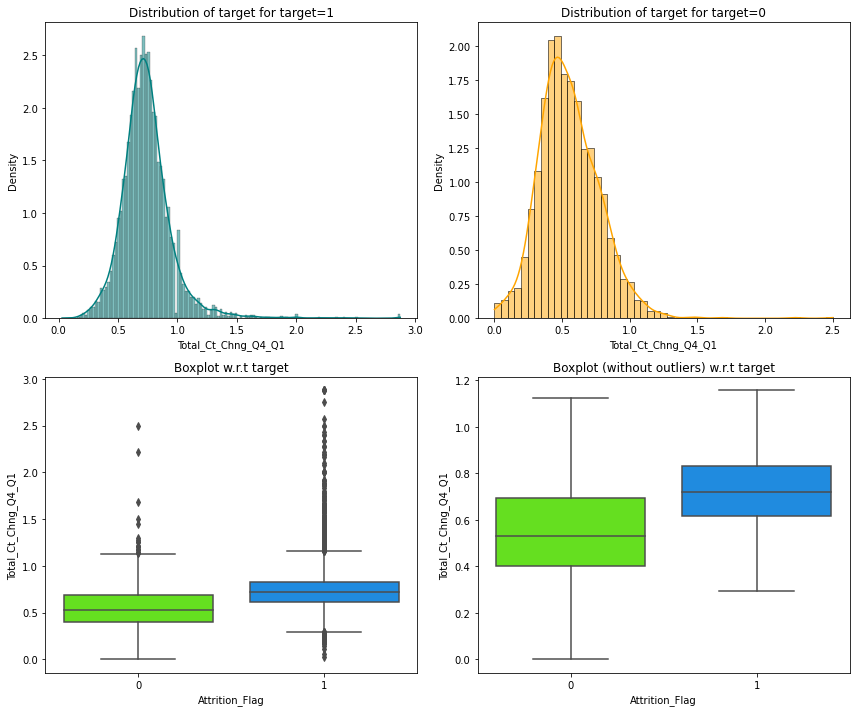

In [74]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

- There is slightly difference in closing account by Total_Ct_Chng_Q4_Q1. if there is lower number of changing, costumer likely to intend to close account.

**'Avg_Utilization_Ratio' vs 'Attrition_Flag'**

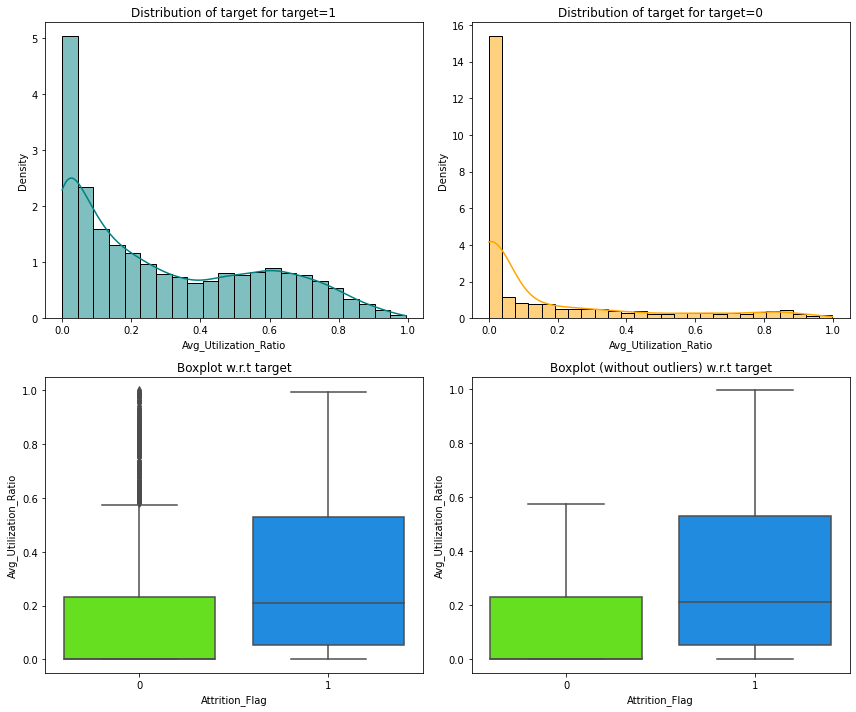

In [75]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

- There is slightly difference in closing account by Avg_Utilization_Ratio . if there is lower utilization ratio, costumer likely to intend to close account.

**'Gender' vs 'Attrition_Flag'**

Attrition_Flag     0     1    All
Gender                           
All             1627  8500  10127
F                930  4428   5358
M                697  4072   4769
------------------------------------------------------------------------------------------------------------------------


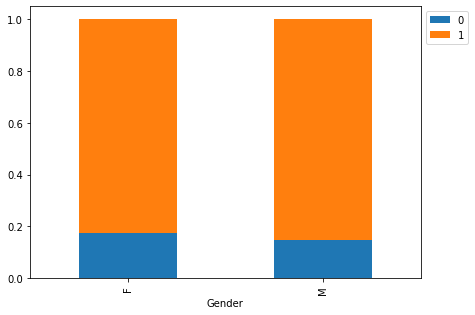

In [76]:
stacked_barplot(data, 'Gender' , 'Attrition_Flag' )

In [77]:
get_ct(data, "Gender")

Attrition_Flag,0,1,Closed Account %
Gender,,,
F,930,4428,17.360
M,697,4072,14.620
All,1627,8500,16.070


- There is no significant differences for closing account by Gender
- ~17% of Female Costumers closed their account.
- ~14% of Male Costumers closed their account. 

**'Dependent_count' vs 'Attrition_Flag'**

Attrition_Flag      0     1    All
Dependent_count                   
All              1627  8500  10127
3                 482  2250   2732
2                 417  2238   2655
1                 269  1569   1838
4                 260  1314   1574
0                 135   769    904
5                  64   360    424
------------------------------------------------------------------------------------------------------------------------


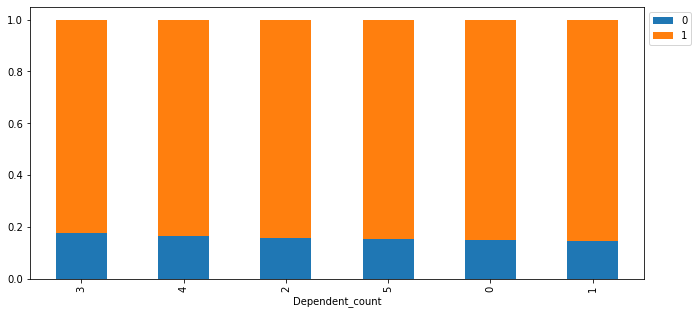

In [78]:
stacked_barplot(data, 'Dependent_count' , 'Attrition_Flag' )

In [79]:
get_ct(data, "Dependent_count")

Attrition_Flag,0,1,Closed Account %
Dependent_count,,,
0,135,769,14.930
1,269,1569,14.640
2,417,2238,15.710
3,482,2250,17.640
4,260,1314,16.520
5,64,360,15.090
All,1627,8500,16.070


- There is no significant differences for closing account by Dependent_count
- the Highest rate is ~17% so that costumer likely to close account if they have 3 dependent in house.

**'Education_Level' vs 'Attrition_Flag'**

Attrition_Flag      0     1    All
Education_Level                   
All              1627  8500  10127
Graduate          930  4684   5614
High School       306  1707   2013
Uneducated        237  1250   1487
College           154   859   1013
------------------------------------------------------------------------------------------------------------------------


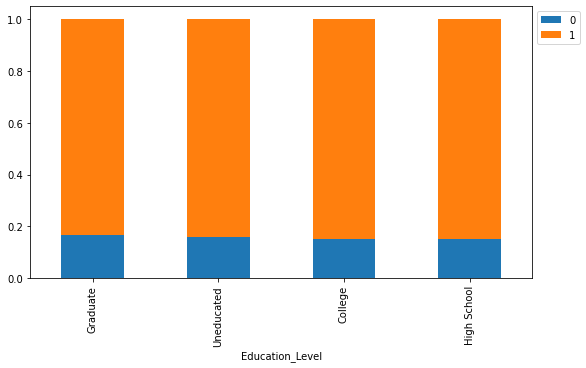

In [80]:
stacked_barplot(data, 'Education_Level' , 'Attrition_Flag' )

In [81]:
get_ct(data, "Education_Level")

Attrition_Flag,0,1,Closed Account %
Education_Level,,,
Graduate,930,4684,16.570
High School,306,1707,15.200
Uneducated,237,1250,15.940
College,154,859,15.200
All,1627,8500,16.070


- There is no significant differences for closing account by Education_Level
- the Highest rate is ~16% so that costumer likely to close account if they have Graduate degree.

**'Marital_Status' vs 'Attrition_Flag'**

Attrition_Flag     0     1    All
Marital_Status                   
All             1627  8500  10127
Married          838  4598   5436
Single           668  3275   3943
Divorced         121   627    748
------------------------------------------------------------------------------------------------------------------------


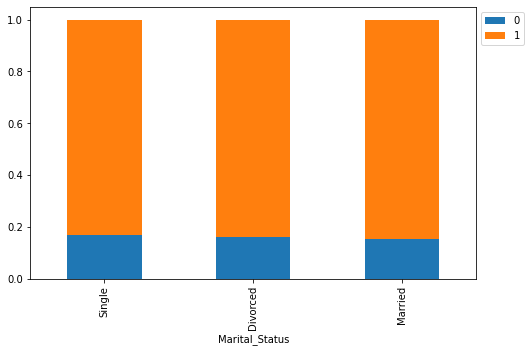

In [82]:
stacked_barplot(data, 'Marital_Status' , 'Attrition_Flag' )

In [83]:
get_ct(data, "Marital_Status")

Attrition_Flag,0,1,Closed Account %
Marital_Status,,,
Married,838,4598,15.420
Single,668,3275,16.940
Divorced,121,627,16.180
All,1627,8500,16.070


- There is no significant differences for closing account by Marital_Status

**'Income_Category' vs 'Attrition_Flag'**

Attrition_Flag      0     1    All
Income_Category                   
All              1627  8500  10127
Less than $40K    612  2949   3561
$40K - $60K       458  2444   2902
$80K - $120K      242  1293   1535
$60K - $80K       189  1213   1402
$120K +           126   601    727
------------------------------------------------------------------------------------------------------------------------


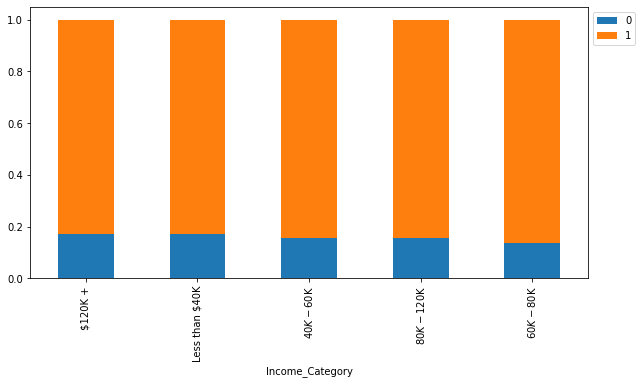

In [84]:
stacked_barplot(data, 'Income_Category' , 'Attrition_Flag' )

In [85]:
get_ct(data, "Income_Category")

Attrition_Flag,0,1,Closed Account %
Income_Category,,,
Less than $40K,612,2949,17.190
$40K - $60K,458,2444,15.780
$80K - $120K,242,1293,15.770
$60K - $80K,189,1213,13.480
$120K +,126,601,17.330
All,1627,8500,16.070


- There is no significant differences for closing account by Income_Category
- the Highest rate is ~17% so that costumer likely to close account if they have $120K+ income.

**'Card_Category' vs 'Attrition_Flag'**

Attrition_Flag     0     1    All
Card_Category                    
All             1627  8500  10127
Blue            1519  7917   9436
Silver            82   473    555
Gold              21    95    116
Platinum           5    15     20
------------------------------------------------------------------------------------------------------------------------


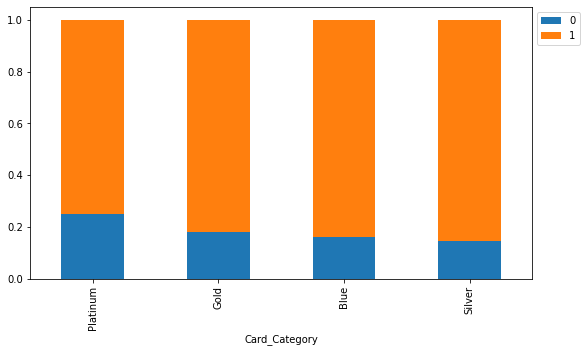

In [86]:
stacked_barplot(data, 'Card_Category' , 'Attrition_Flag' )

In [87]:
get_ct(data, "Card_Category")

Attrition_Flag,0,1,Closed Account %
Card_Category,,,
Blue,1519,7917,16.100
Gold,21,95,18.100
Platinum,5,15,25.000
Silver,82,473,14.770
All,1627,8500,16.070


- the highest rate is ~25% so that costumer likely to close account if they have Platinium card 

**'Total_Relationship_Count' vs 'Attrition_Flag'**

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       1627  8500  10127
3                          400  1905   2305
2                          346   897   1243
1                          233   677    910
5                          227  1664   1891
4                          225  1687   1912
6                          196  1670   1866
------------------------------------------------------------------------------------------------------------------------


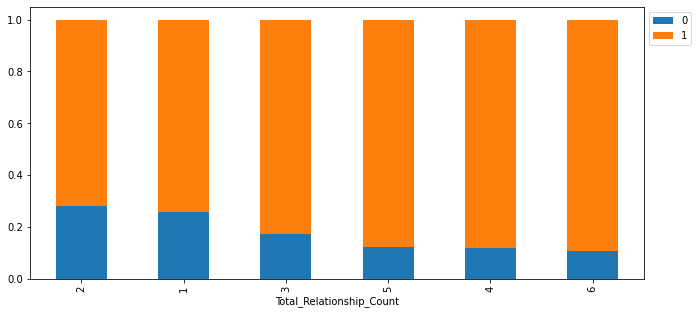

In [88]:
stacked_barplot(data, 'Total_Relationship_Count' , 'Attrition_Flag' )

In [89]:
get_ct(data, "Total_Relationship_Count")

Attrition_Flag,0,1,Closed Account %
Total_Relationship_Count,,,
1,233,677,25.600
2,346,897,27.840
3,400,1905,17.350
4,225,1687,11.770
5,227,1664,12.000
6,196,1670,10.500
All,1627,8500,16.070


- the highest rate is ~27% so that costumer likely to close account if they have 2 or less account in the bank.

**'Months_Inactive_12_mon' vs 'Attrition_Flag'**

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     1627  8500  10127
3                        826  3020   3846
2                        505  2777   3282
4                        130   305    435
1                        100  2133   2233
5                         32   146    178
6                         19   105    124
0                         15    14     29
------------------------------------------------------------------------------------------------------------------------


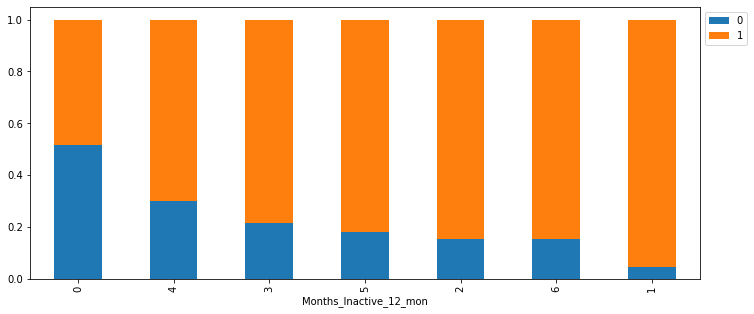

In [90]:
stacked_barplot(data, 'Months_Inactive_12_mon' , 'Attrition_Flag' )

In [91]:
get_ct(data, "Months_Inactive_12_mon")

Attrition_Flag,0,1,Closed Account %
Months_Inactive_12_mon,,,
0,15,14,51.720
1,100,2133,4.480
2,505,2777,15.390
3,826,3020,21.480
4,130,305,29.890
5,32,146,17.980
6,19,105,15.320
All,1627,8500,16.070


- the highest rate is ~30% so that costumer likely to close account if they have 4 month inactivity period in their bank account.

**'Contacts_Count_12_mon' vs 'Attrition_Flag'**

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    1627  8500  10127
3                       681  2699   3380
2                       403  2824   3227
4                       315  1077   1392
1                       108  1391   1499
5                        59   117    176
6                        54     0     54
0                         7   392    399
------------------------------------------------------------------------------------------------------------------------


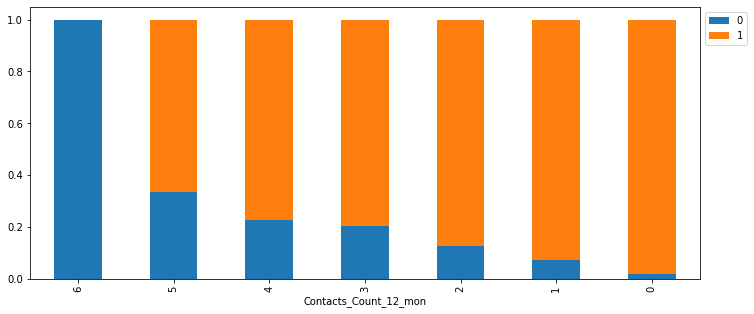

In [92]:
stacked_barplot(data, 'Contacts_Count_12_mon' , 'Attrition_Flag' )

In [93]:
get_ct(data, "Contacts_Count_12_mon")

Attrition_Flag,0,1,Closed Account %
Contacts_Count_12_mon,,,
0,7,392,1.750
1,108,1391,7.200
2,403,2824,12.490
3,681,2699,20.150
4,315,1077,22.630
5,59,117,33.520
6,54,0,100.000
All,1627,8500,16.070


In [94]:
data[data["Contacts_Count_12_mon"]==6]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3049,0,48,M,3,Graduate,Married,$120K +,Blue,35,2,2,6,34516.000,0,34516.000,0.464,1632,44,0.333,0.000
3157,0,47,M,4,Graduate,Married,$40K - $60K,Blue,34,2,3,6,9080.000,2174,6906.000,0.653,2098,46,0.586,0.239
3366,0,44,M,3,Graduate,Married,$40K - $60K,Blue,40,2,2,6,9502.000,2457,7045.000,0.915,2310,57,0.676,0.259
3436,0,47,F,3,Graduate,Married,$40K - $60K,Blue,31,6,3,6,5496.000,0,5496.000,0.548,1913,34,0.308,0.000
3851,0,48,M,4,Graduate,Married,$80K - $120K,Blue,41,2,3,6,4806.000,1357,3449.000,0.573,1771,35,0.346,0.282
3988,0,47,M,4,Uneducated,Single,$120K +,Blue,37,3,2,6,34516.000,1126,33390.000,0.575,1736,35,0.400,0.033
4189,0,45,F,3,High School,Single,$40K - $60K,Blue,35,3,2,6,3512.000,2517,995.000,0.597,1801,48,0.548,0.717
4339,0,46,F,4,Graduate,Married,$40K - $60K,Blue,26,3,3,6,15195.000,0,15195.000,0.726,2631,41,0.640,0.000
4593,0,56,M,4,High School,Married,$60K - $80K,Blue,43,6,2,6,4535.000,0,4535.000,0.831,2342,40,0.600,0.000
4740,0,32,F,1,Graduate,Single,Less than $40K,Blue,36,3,3,6,2761.000,0,2761.000,1.047,2753,43,0.654,0.000


- 100% of the costumers who have been contacted 6 times by the bank in a year closed their account and if costumers have more contacts by the bank, they intend to close their credit card account more likely. 
- This is not an expected results, so the bank should look over the Costumer services department and investigate this contacts records. it's highly recommended.

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

### Data Preparation for Modeling

In [96]:
data1 = data.copy()

### Treating Outliers

In [97]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [98]:
col_list= ["Avg_Utilization_Ratio", "Months_on_book", "Credit_Limit", 
           "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1",
           "Total_Trans_Amt", "Total_Ct_Chng_Q4_Q1", "Total_Trans_Ct"]

treat_outliers_all(data1, col_list)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39.000,5,1,3,12691.000,777,11914.000,1.201,1144.000,42,1.172,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44.000,6,1,2,8256.000,864,7392.000,1.201,1291.000,33,1.172,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36.000,4,1,0,3418.000,0,3418.000,1.201,1887.000,20,1.172,0.000
3,1,40,F,4,High School,Married,Less than $40K,Blue,34.000,3,4,1,3313.000,2517,796.000,1.201,1171.000,20,1.172,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.000,5,1,0,4716.000,0,4716.000,1.201,816.000,28,1.172,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,M,2,Graduate,Single,$40K - $60K,Blue,40.000,3,2,3,4003.000,1851,2152.000,0.703,8619.250,117,0.857,0.462
10123,0,41,M,2,Graduate,Divorced,$40K - $60K,Blue,25.000,4,2,3,4277.000,2186,2091.000,0.804,8619.250,69,0.683,0.511
10124,0,44,F,1,High School,Married,Less than $40K,Blue,36.000,5,3,4,5409.000,0,5409.000,0.819,8619.250,60,0.818,0.000
10125,0,30,M,2,Graduate,Married,$40K - $60K,Blue,36.000,4,3,3,5281.000,0,5281.000,0.535,8395.000,62,0.722,0.000


In [99]:
# creating dummy varibles
data1 = pd.get_dummies(
    data1,
    columns=[
        "Gender",
        "Dependent_count",
        "Education_Level",
        "Marital_Status",
        "Income_Category",
        "Card_Category",
        "Total_Relationship_Count",
        "Months_Inactive_12_mon",
        "Contacts_Count_12_mon",
    ],
    drop_first=True,
)
data1.head()

,Attrition_Flag,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Dependent_count_1,Dependent_count_2,Dependent_count_3,Dependent_count_4,Dependent_count_5,Education_Level_High School,Education_Level_Uneducated,Education_Level_College,Marital_Status_Single,Marital_Status_Divorced,Income_Category_$40K - $60K,Income_Category_$80K - $120K,Income_Category_$60K - $80K,Income_Category_$120K +,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Total_Relationship_Count_2,Total_Relationship_Count_3,Total_Relationship_Count_4,Total_Relationship_Count_5,Total_Relationship_Count_6,Months_Inactive_12_mon_1,Months_Inactive_12_mon_2,Months_Inactive_12_mon_3,Months_Inactive_12_mon_4,Months_Inactive_12_mon_5,Months_Inactive_12_mon_6,Contacts_Count_12_mon_1,Contacts_Count_12_mon_2,Contacts_Count_12_mon_3,Contacts_Count_12_mon_4,Contacts_Count_12_mon_5,Contacts_Count_12_mon_6
0,1,45,39.000,12691.000,777,11914.000,1.201,1144.000,42,1.172,0.061,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1,49,44.000,8256.000,864,7392.000,1.201,1291.000,33,1.172,0.105,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
2,1,51,36.000,3418.000,0,3418.000,1.201,1887.000,20,1.172,0.000,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,40,34.000,3313.000,2517,796.000,1.201,1171.000,20,1.172,0.760,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,1,40,21.000,4716.000,0,4716.000,1.201,816.000,28,1.172,0.000,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [100]:
data1.shape

(10127, 46)

In [101]:
# Separating target variable and other variables
X = data1.drop(columns="Attrition_Flag")
X = pd.get_dummies(X)

Y = data1["Attrition_Flag"]

In [102]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 45) (2026, 45) (2026, 45)


### Missing-Value Treatment

* We will use median to impute missing values in Income column.

In [103]:
imputer = SimpleImputer(strategy="median")
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

## Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will have an account and the customer doesn't have - Loss of resources
2. Predicting a customer will not have an account and the customer have - Loss of opportunity

#### Which case is more important? 
* Predicting that customer will not have an account but the customer have i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

**Let's start by building different models using KFold and cross_val_score and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [104]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 97.27425965479422
Random forest: 98.68608208739825
GBM: 98.80369066174065
Adaboost: 97.96043795339531
Xgboost: 98.70559371933268
dtree: 96.13683157266833

Training Performance:

Bagging: 99.80388311433614
Random forest: 100.0
GBM: 99.25475583447735
Adaboost: 98.37222984899
Xgboost: 100.0
dtree: 100.0


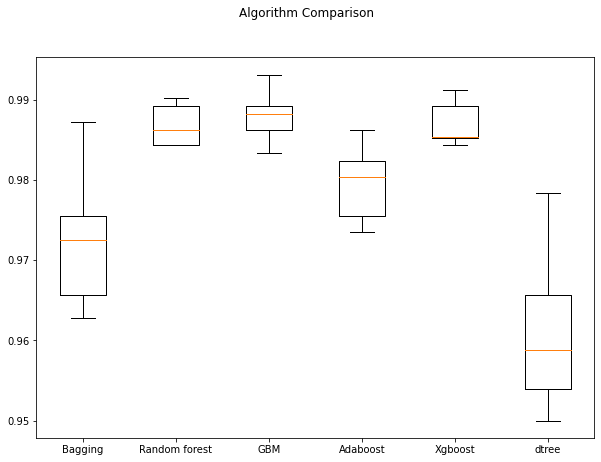

In [105]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that GradientBoosting is giving the highest cross-validated recall followed by XGBoost
- The boxplot shows that no outliers, because we treated outliers in data preparation part.
- The Performance of GradientBoosting and XGBoost is generalised on validation set as well.
- We will tune - GradientBoosting and XGBoost and see if the performance improves. 

## Hyperparameter Tuning

**We will tune Adaboost and xgboost models using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

**First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

In [106]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [119]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")

## GradientBoosting

### GridSearchCV

In [121]:
%%time 

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    'subsample':[0.7,0.8,0.9,1],
    'max_features':[0.7,0.8,0.9,1],
    'max_depth':[3,5,7,10]
    
    
}

# Type of scoring used to compare parameter combinations
scorer = "recall"

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'learning_rate': 0.01, 'n_estimators': 10} 
Score: 1.0
Wall time: 1min 3s


In [122]:
# building model with best parameters
GB_tuned1 = GradientBoostingClassifier(
    n_estimators=10,
    learning_rate=0.01,
    random_state=1,
)

# Fit the model on training data
GB_tuned1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=10, random_state=1)

In [123]:
# Calculating different metrics on train set
GB_grid_train = model_performance_classification_sklearn(
    GB_tuned1, X_train, y_train
)
print("Training performance:")
GB_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.839,1.000,0.839,0.913


In [124]:
# Calculating different metrics on validation set
GB_grid_val = model_performance_classification_sklearn(GB_tuned1, X_val, y_val)
print("Validation performance:")
GB_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.839,1.000,0.839,0.913


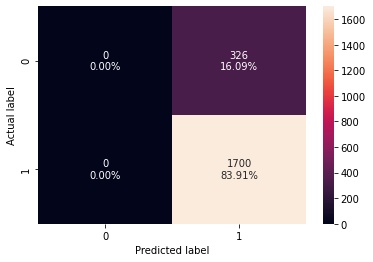

In [120]:
# creating confusion matrix
confusion_matrix_sklearn(GB_tuned1, X_val, y_val)

- The validation recall is similar to cross-validated recall
- The Training and validation recall is 1 the model is perfect at identifying potential customers who would open account.

### RandomizedSearchCV

In [130]:
%%time 

# defining model
model =GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    'subsample':[0.7,0.8,0.9,1],
    'max_features':[0.7,0.8,0.9,1],
    'max_depth':[3,5,7,10]
}

# Type of scoring used to compare parameter combinations
scorer = "recall"

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 20, 'max_features': 1, 'max_depth': 3, 'learning_rate': 0.1} with CV score=1.0:
Wall time: 1min 38s


In [132]:
# building model with best parameters
GB_tuned2 = GradientBoostingClassifier(
    n_estimators=20,
    learning_rate=0.1,
    subsample= 0.9,
    max_features= 1,
    max_depth= 3,
    random_state=1,
)

# Fit the model on training data
GB_tuned2.fit(X_train, y_train)

GradientBoostingClassifier(max_features=1, n_estimators=20, random_state=1,
                           subsample=0.9)

In [133]:
# Calculating different metrics on train set
GB_random_train = model_performance_classification_sklearn(
    GB_tuned2, X_train, y_train
)
print("Training performance:")
GB_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.843,1.000,0.842,0.914


In [134]:
# Calculating different metrics on validation set
GB_random_val = model_performance_classification_sklearn(GB_tuned2, X_val, y_val)
print("Validation performance:")
GB_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.840,1.000,0.840,0.913


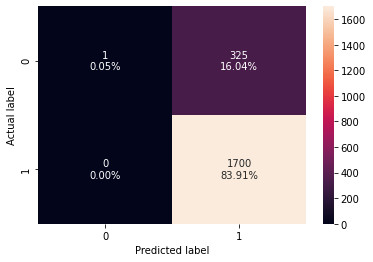

In [135]:
# creating confusion matrix
confusion_matrix_sklearn(GB_tuned2, X_val, y_val)

- Grid search took a significantly longer time than random search. This difference would further increase as the number of parameters increases. 
- The results from both grid and random search are similar

## XGBoost

### GridSearchCV  

In [136]:
%%time 

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = "recall"

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 5, 'scale_pos_weight': 2, 'subsample': 0.8} with CV score=1.0:
Wall time: 42min 6s


In [142]:
# building model with best parameters
xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=2,
    subsample=0.8,
    learning_rate=0.01,
    gamma=0,
    eval_metric="logloss",
    reg_lambda=5,
    max_depth=1,
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=2, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [143]:
# Calculating different metrics on train set
xgboost_grid_train = model_performance_classification_sklearn(
    xgb_tuned1, X_train, y_train
)
print("Training performance:")
xgboost_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.839,1.000,0.839,0.913


In [144]:
# Calculating different metrics on validation set
xgboost_grid_val = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("Validation performance:")
xgboost_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.839,1.000,0.839,0.913


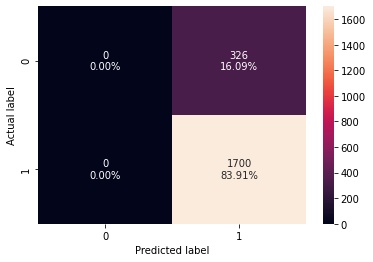

In [145]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_val, y_val)

- The validation is same as compared to the result from cross-validation with default parameters.
- The model has also good precision score (however low precision shouldn't affect us much here)

### RandomizedSearchCV

In [141]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = "recall"

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 10, 'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.01, 'gamma': 5} with CV score=1.0:
Wall time: 40.9 s


In [146]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=2,
    gamma=1,
    subsample=0.8,
    learning_rate=0.01,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=2, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [147]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.839,1.000,0.839,0.913


In [148]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.839,1.000,0.839,0.913


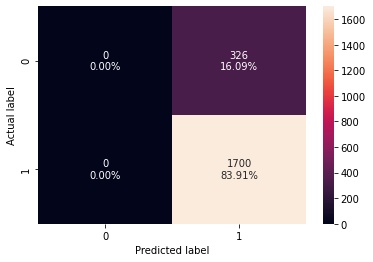

In [149]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

- The parameters obtained from both grid search and random search are approximately same
- The performance of both the models is also very similar
- Tuning with grid search took a significantly longer time

## Comparing all models

In [150]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        GB_grid_train.T,
        GB_random_train.T,
        xgboost_grid_train.T,
        xgboost_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "GradientBoosting Tuned with Grid search",
    "GradientBoosting Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,GradientBoosting Tuned with Grid search,GradientBoosting Tuned with Random search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.839,0.843,0.839,0.839
Recall,1.000,1.000,1.000,1.000
Precision,0.839,0.842,0.839,0.839
F1,0.913,0.914,0.913,0.913


In [151]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        GB_grid_val.T,
        GB_random_val.T,
        xgboost_grid_val.T,
        xgboost_random_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "GradientBoosting Tuned with Grid search",
    "GradientBoosting Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,GradientBoosting Tuned with Grid search,GradientBoosting Tuned with Random search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.839,0.840,0.839,0.839
Recall,1.000,1.000,1.000,1.000
Precision,0.839,0.840,0.839,0.839
F1,0.913,0.913,0.913,0.913


- The xgboost and GradientBoosting  model tuned using Grid search is giving the best validation recall of 1 but it has the lower values of train and validation precision.
- Let's check the model's performance on test set and then see the feature importance from the tuned xgboost model

#### Performance on the test set

In [152]:
# Calculating different metrics on the test set
xgboost_grid_test = model_performance_classification_sklearn(xgb_tuned1, X_test, y_test)
print("Test performance:")
xgboost_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.840,1.000,0.840,0.913


- The performance on test data is generalised

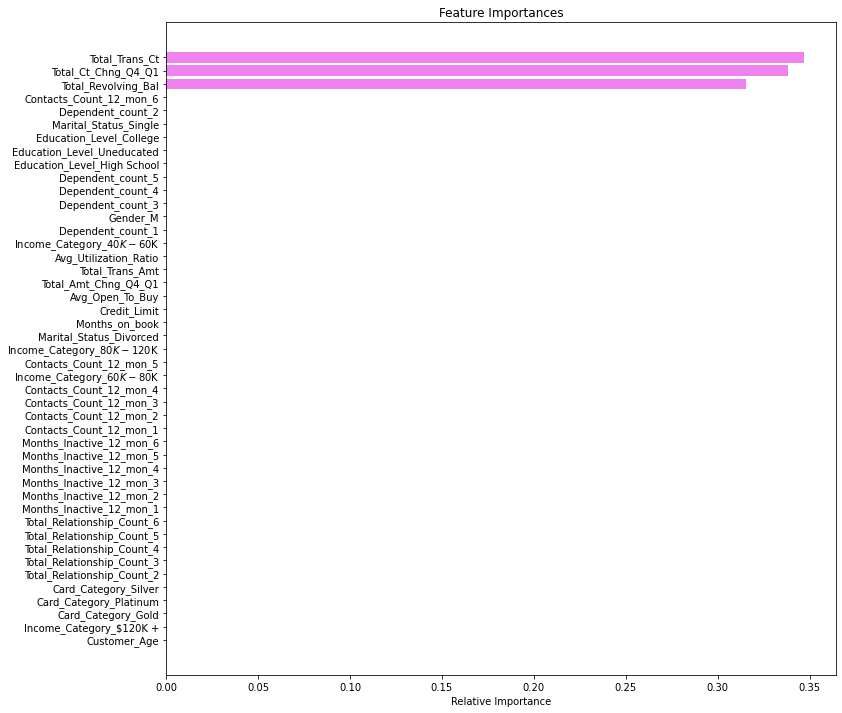

In [153]:
feature_names = X.columns
importances = xgb_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_trans_ct, Total_Ct_chg_Q4_Q1 and Total_Revolving_Bal are the most important features in the dataset.

## Pipelines for productionizing the model
- Now, we have a final model. let's use pipelines to put the model into production



## Column Transformer
- We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
- Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

- We will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [192]:
# creating a list of numerical variables

numerical_features= ["Customer_Age", "Months_on_book", "Credit_Limit", 
           "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1",
           "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables

categorical_features = [
    
        "Gender",
        "Dependent_count",
        "Education_Level",
        "Marital_Status",
        "Income_Category",
        "Card_Category",
        "Total_Relationship_Count",
        "Months_Inactive_12_mon",
        "Contacts_Count_12_mon",       
]


# categorical_features = [
#         "Gender_M",
#         "Dependent_count_1",
#         "Dependent_count_2",
#         "Dependent_count_3",
#         "Dependent_count_4",
#         "Dependent_count_5",
#         "Education_Level_High School",
#         "Education_Level_Uneducated",
#         "Education_Level_College",
#         "Marital_Status_Single",
#         "Marital_Status_Divorced",
#         "Income_Category_$40K - $60K",
#         "Income_Category_$80K - $120K",
#         "Income_Category_$60K - $80K",
#         "Income_Category_$120K +",
#         "Card_Category_Gold",
#         "Card_Category_Platinum",
#         "Card_Category_Silver",
#         "Total_Relationship_Count_2",
#         "Total_Relationship_Count_3",
#         "Total_Relationship_Count_4",
#         "Total_Relationship_Count_5",
#         "Total_Relationship_Count_6",
#         "Months_Inactive_12_mon_1",
#         "Months_Inactive_12_mon_2",
#         "Months_Inactive_12_mon_3",
#         "Months_Inactive_12_mon_4",
#         "Months_Inactive_12_mon_5",
#         "Months_Inactive_12_mon_6",
#         "Contacts_Count_12_mon_1",
#         "Contacts_Count_12_mon_2",
#         "Contacts_Count_12_mon_3",
#         "Contacts_Count_12_mon_4",
#         "Contacts_Count_12_mon_5",
#         "Contacts_Count_12_mon_6",
    
# ]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


In [193]:
data2= data.copy()

In [194]:
# Separating target variable and other variables
X = data2.drop(columns="Attrition_Flag")
Y = data2["Attrition_Flag"]

- Now we already know the best model we need to process with, so we don't need to divide data into 3 parts

In [195]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [198]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=2,
    gamma=1,
    subsample=0.8,
    learning_rate=0.01,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=10,
                
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                          

## Business Recommendations

- Company should target customers who have Platinum card - who the bank contacted more and who is inactive first 4 month - as these customers can close account more likely. The company should further launch premium offers for such customers. and Such offers can also be extended to customers with higher income, which is over 120k. 
- We observed in our analysis that ~53% of customers are married but single customers, including divorced, are more equally or more likely to close their account. The company should expand its customers by customizing offers to attract more single customers.
- Customers who are not frequent buyers, and have less revolving balance and they do less transaction with their card should be targeted more by the company and offer them added benefits because they are more likely to intend to close their account.
- Total revolving balance and total credit usage has decreased over the costumers which shows that either our products qualities have declined or the company lacks marketing strategies. The company should constantly improve its marketing strategies to address such issues.
- Our analysis showed that ~100% of customers had 6 times contacted in a year which can be closed their account. that means there is some costumer service satisfaction problem so that The company should create easy mechanisms to satisfy the costumers and gather some feedback from the customers and use it to identify major concerns if any.
- The number of Total transaction count is an important feature and the company should work on customizing its website to allow more traffic on the website and easy user interface. The company can improve the interface and provide easy sign-in, sign-out and more functional button or one-touch options.